<a href="https://colab.research.google.com/github/shashwatsharma0402/ML/blob/master/IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link='https://drive.google.com/file/d/14s44-xik0NjVtc2R8Gxj6jdI-JE64ysV/view?usp=sharing'

In [ ]:
fluff, id = link.split('=')
id = '14s44-xik0NjVtc2R8Gxj6jdI-JE64ysV'
print (id) # Verify that you have everything after '='

14s44-xik0NjVtc2R8Gxj6jdI-JE64ysV


In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('corona_tweets_01.csv')  
dataframe=pd.read_csv("corona_tweets_01.csv", header=None)

In [ ]:
dataframe=pd.DataFrame(dataframe[0])

In [ ]:
dataframe.to_csv("ready_corona_tweets_01.txt", index=False, header=None)
dataframe

In [ ]:
pip install twarc

In [ ]:
accesstoken='1427751738-lXHLG1ocIx0K83p5OKuqfmfnbtugZn4n1S1GzA7'
accesstokenkey='EcTbXH6bYC2nJEyZGXEakfJiPcFixdS2i4txSYx2cXE0f'
apikey='6iaCc1iamER8NdvOCApHMN7Io'
apisecretkey='qKZ7jnoHFYzhZdgxku1dWAAgTQfUhvMOK40x4L0yy98BRPwYow'

In [ ]:
from twarc import Twarc

In [ ]:
t = Twarc(apikey, apisecretkey, accesstoken, accesstokenkey)

In [ ]:
list_tweets=[]
for x,tweet in enumerate(t.hydrate(open('ready_corona_tweets_01.txt'))):
  if(x==100):
    break;
  list_tweets.append(tweet['full_text'])

In [ ]:
list_tweets

In [ ]:
# Create a function to clean the tweets
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    text.encode('ascii', 'ignore').decode('ascii')
    return regrex_pattern.sub(r'',text)

def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub('\n', '', text) #REmoving Marks
 text = re.sub(':', '', text) #REmoving Marks
 text = re.sub('_', '', text) #REmoving Marks
 
 text=deEmojify(text)
 return text



list_tweets=list(map(cleanTxt,list_tweets))

In [ ]:
list_tweets_final=[]
for x,tweet in enumerate(t.hydrate(open('ready_corona_tweets_01.txt'))):
  list_tweets_final.append(tweet['full_text'])

In [ ]:
list_tweets_final=list(map(cleanTxt,list_tweets_final))

In [ ]:
data_tweets=pd.DataFrame(list_tweets_final,columns=["Tweets"])

In [ ]:
data_tweets.head()

,Tweets
0,Wuhan has been in complete quarantine for over...
1,here’s a deleted scene from TWD’s special on ...
2,You can no longer defend this.Make up any exc...
3,Pretty much any corona virus germ that wants t...
4,Good.It came from China.


In [53]:
data_tweets.to_csv("data_1.csv", index=False, header=None)

In [55]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [56]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
data_tweets['Subjectivity'] = data_tweets['Tweets'].apply(getSubjectivity)
data_tweets['Polarity'] = data_tweets['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
data_tweets


,Tweets,Subjectivity,Polarity
0,Wuhan has been in complete quarantine for over...,0.387500,0.116071
1,here’s a deleted scene from TWD’s special on ...,0.571429,0.357143
2,You can no longer defend this.Make up any exc...,0.050000,-0.050000
3,Pretty much any corona virus germ that wants t...,0.433333,0.216667
4,Good.It came from China.,0.000000,0.000000
...,...,...,...
130290,This is for CORONA you big fat white nasty s...,0.366667,-0.333333
130291,Corona Virus and the Politics of Eugenicsabort...,0.000000,0.000000
130292,HQ CoronaVirus in nations with minimal borderc...,0.600000,-0.100000
130293,Disgusting!,1.000000,-1.000000


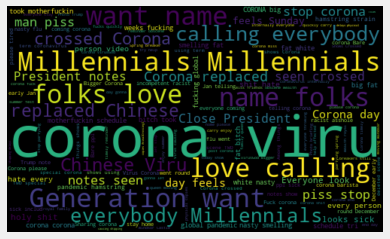

In [58]:
# word cloud visualization
allWords = ' '.join([twts for twts in data_tweets['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [60]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
data_tweets['Analysis'] = data_tweets['Polarity'].apply(getAnalysis)
# Show the dataframe
data_tweets


,Tweets,Subjectivity,Polarity,Analysis
0,Wuhan has been in complete quarantine for over...,0.387500,0.116071,Positive
1,here’s a deleted scene from TWD’s special on ...,0.571429,0.357143,Positive
2,You can no longer defend this.Make up any exc...,0.050000,-0.050000,Negative
3,Pretty much any corona virus germ that wants t...,0.433333,0.216667,Positive
4,Good.It came from China.,0.000000,0.000000,Neutral
...,...,...,...,...
130290,This is for CORONA you big fat white nasty s...,0.366667,-0.333333,Negative
130291,Corona Virus and the Politics of Eugenicsabort...,0.000000,0.000000,Neutral
130292,HQ CoronaVirus in nations with minimal borderc...,0.600000,-0.100000,Negative
130293,Disgusting!,1.000000,-1.000000,Negative


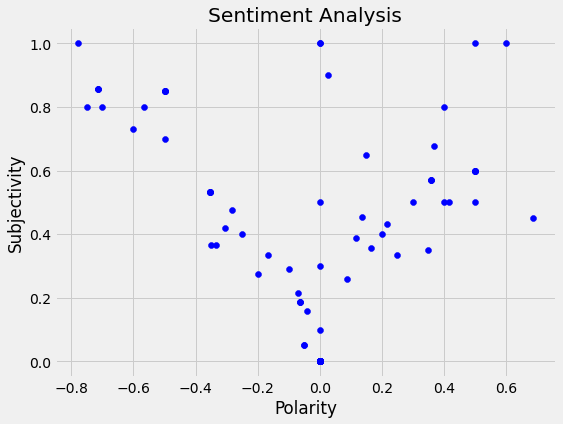

In [62]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(data_tweets["Polarity"][i], data_tweets["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [64]:
# Print the percentage of positive tweets
ptweets = data_tweets[data_tweets.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / data_tweets.shape[0]) * 100 , 1)

28.8

In [65]:
# Print the percentage of negative tweets
ntweets = data_tweets[data_tweets.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / data_tweets.shape[0]) * 100, 1)

26.8

In [66]:
# Show the value counts
data_tweets['Analysis'].value_counts()

Neutral     57888
Positive    37524
Negative    34883
Name: Analysis, dtype: int64

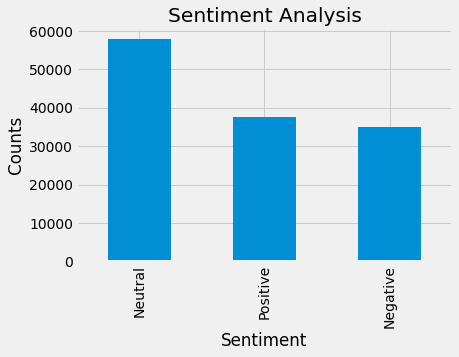

In [68]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data_tweets['Analysis'].value_counts().plot(kind = 'bar')
plt.show()